### Ambil Data Pokemon dari https://pokemondb.net/pokedex/all 

In [18]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [19]:
alamat = "https://pokemondb.net/pokedex/all"
safeAdd = Request(alamat, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(safeAdd)
data = BeautifulSoup(html, 'html.parser')

In [20]:
table = data.find("table", {"class":"data-table"})
rows = table.findAll("tr")
head = table.findAll("div", {"class":"sortwrap"})

In [21]:
headers = []
for i in head:
    headers.append(i.get_text())

In [22]:
hasil = []
for row in rows:
    info = []
    for i in row.findAll("td"):
        info.append(i.get_text().strip())
    if "851" in info:
        break
    else:
        hasil.append(info)

### Data yang Sudah Diambil, Jadikan ke Data Frame

In [23]:
df = pd.DataFrame(hasil, columns=headers)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
#          984 non-null object
Name       984 non-null object
Type       984 non-null object
Total      984 non-null object
HP         984 non-null object
Attack     984 non-null object
Defense    984 non-null object
Sp. Atk    984 non-null object
Sp. Def    984 non-null object
Speed      984 non-null object
dtypes: object(10)
memory usage: 77.0+ KB


In [26]:
df = df.astype({"#":"int", "Total":"int", "HP":"int",
                "Attack":"int", "Defense":"int", "Sp. Atk":"int",
                "Sp. Def":"int", "Speed":"int"})

### Data Pokemon Dilakukan Metode Clustering (K-Means)

In [27]:
df_x = df.iloc[:, 5:7]
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_x)
df["Cluster"] = kmeans.labels_

In [28]:
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,2
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,0
4,4,Charmander,Fire,309,39,52,43,60,50,65,1


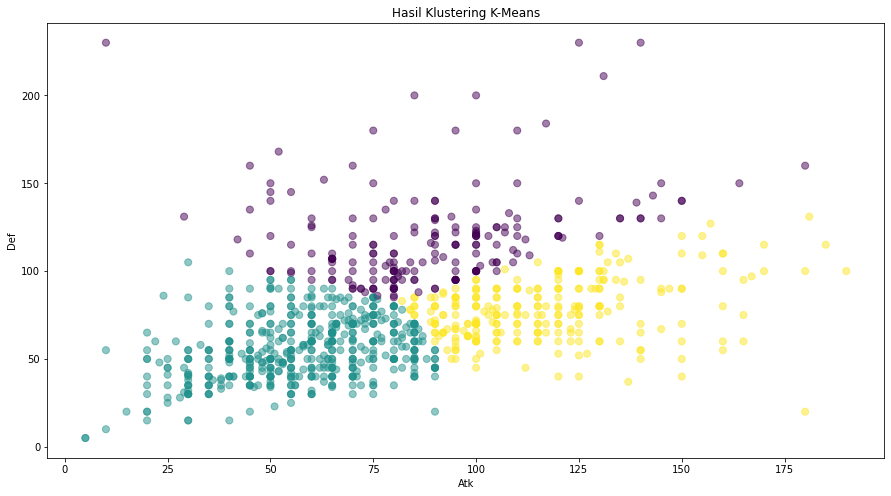

In [29]:
ig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df["Attack"], df["Defense"], s = 50, c=df["Cluster"],
            marker = "o", alpha = 0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Atk")
plt.ylabel("Def")
plt.show()

### Kesimpulan
Terdapat 3 kelompok yang didapat dari hasil klastering:
 - Pertama, kelompok dengan nilai Attack dan Defense rendah (sebelah kiri), yang berarti kekuatan serangan dan pertahanan pokemon lemah.
 - Kedua, kelompok dengan nilai rata-rata Attack lebih tinggi (sebelah kanan), yang artinya pokemon memiliki kelebihan pada serangan.
 - Ketiga, kelompok dengan rata-rata nilai Defense lebih tinggi dari kelompok lain (atas), menandakan bahwa pokemon berfokus pada pertahanan.